# Exploratory Data Analysis on Iris Dataset :

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 

# Importing LazyClassifier 
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings("ignore")

## Data Inspection :

#### Informations :
The Iris dataset is a well-known dataset in machine learning and statistics, introduced by Ronald A. Fisher in 1936. It contains 150 samples of iris flowers, with each sample having four features: sepal length, sepal width, petal length, and petal width, all measured in centimeters. The dataset is categorized into three species: Setosa, Versicolor, and Virginica, with 50 samples for each species.

#### Goal :
The primary goal when working with the Iris dataset is to classify the species of an iris flower based on its sepal and petal measurements. It serves as a classic test case for various classification algorithms.

In [2]:
data = pd.read_csv("iris.csv") 
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


## Data Cleaning :

### Handle Missing Values :

In [7]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

=> there is no missing values

### Remove Duplicates :

In [8]:
print("Number of duplicated lines : ", data.duplicated().sum())

Number of duplicated lines :  1


In [9]:
# remove duplicated data
data.drop_duplicates(inplace=True)

## Data Visualization :

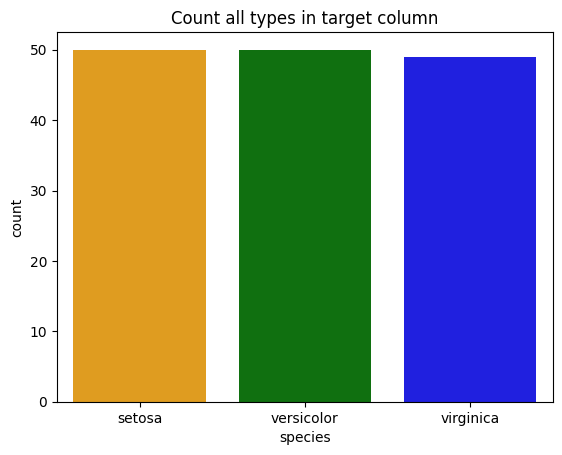

In [10]:
sns.countplot(x='species', data=data, palette=["orange", "green", "blue"], hue='species')
plt.title("Count all types in target column")
plt.show()

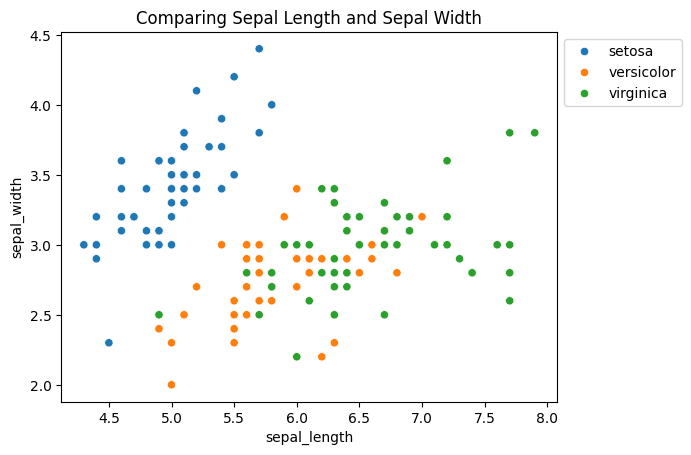

In [11]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Comparing Sepal Length and Sepal Width")
plt.show()

From the above plot, we can infer that :

- Species Setosa has smaller sepal lengths but larger sepal widths.
- Versicolor Species has middle values of sepal lengths and widths.
- Species Virginica has larger sepal lengths but smaller sepal widths.

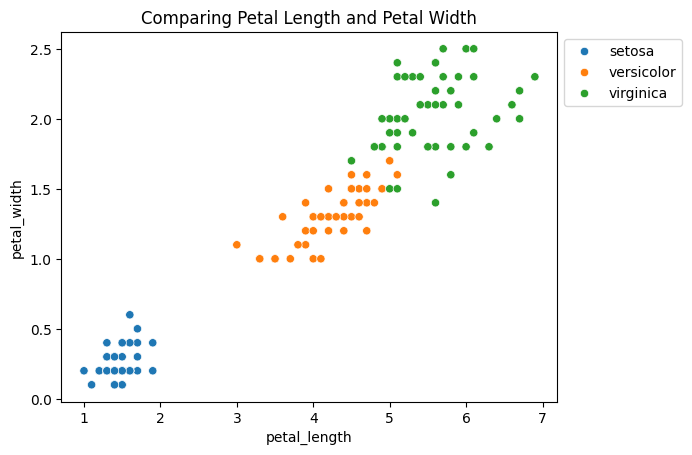

In [12]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=data)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Comparing Petal Length and Petal Width")
plt.show()

From the above plot, we can infer that :

- Species Setosa has smaller petal lengths and widths.
- Versicolor Species has middle values of sepal lengths and widths.
- Species Virginica has the largest of petal lengths and widths.

-> The same inference  of the previous plot.

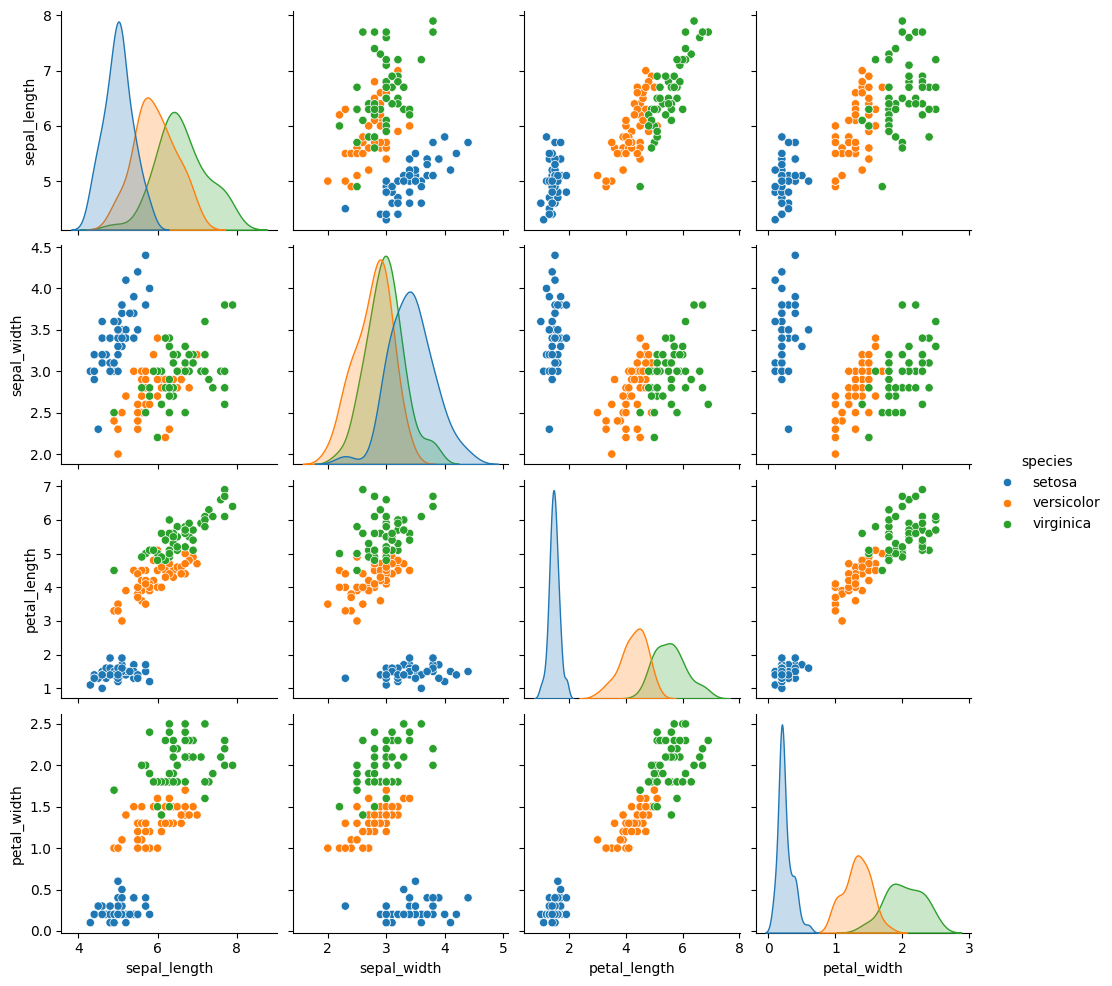

In [13]:
sns.pairplot(data, hue='species')

#### Histograms plot :

##### Let's display the distribution of each feature :

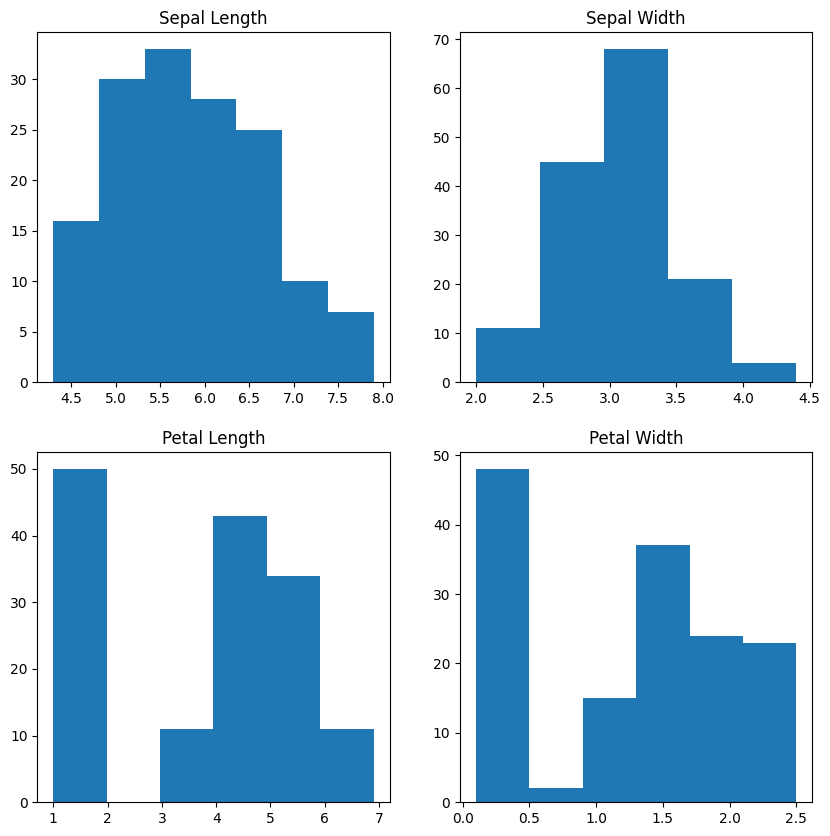

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10,10)) 
  
axes[0,0].set_title("Sepal Length") 
axes[0,0].hist(data['sepal_length'], bins=7) 
  
axes[0,1].set_title("Sepal Width") 
axes[0,1].hist(data['sepal_width'], bins=5); 
  
axes[1,0].set_title("Petal Length") 
axes[1,0].hist(data['petal_length'], bins=6); 
  
axes[1,1].set_title("Petal Width") 
axes[1,1].hist(data['petal_width'], bins=6);

From the above plot, we can see that : 

- The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
- The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
- The highest frequency of the petal length is around 50 which is between 1 and 2
- The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

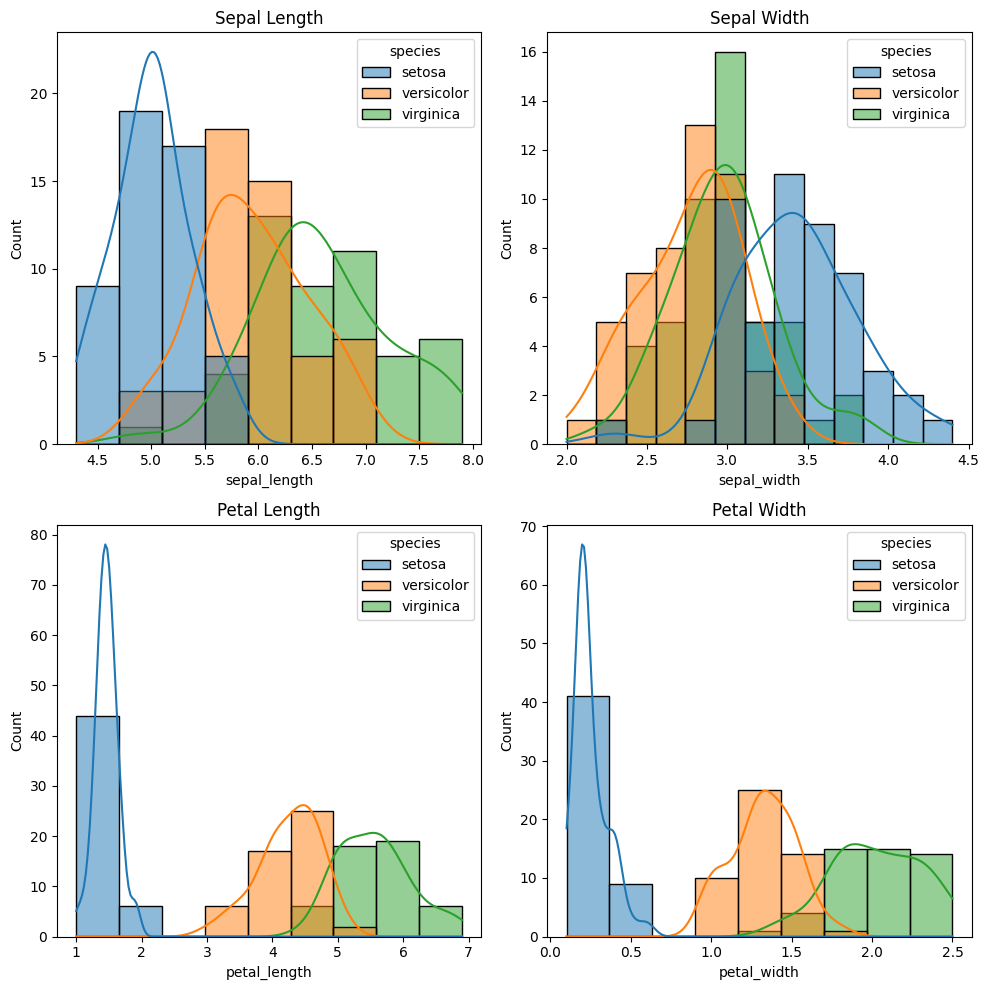

In [15]:
# Assuming 'data' is your DataFrame containing the iris dataset
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Sepal Length
axes[0,0].set_title("Sepal Length")
sns.histplot(data=data, x="sepal_length", hue="species", kde=True, ax=axes[0,0])

# Sepal Width
axes[0,1].set_title("Sepal Width")
sns.histplot(data=data, x="sepal_width", hue="species", kde=True, ax=axes[0,1])

# Petal Length
axes[1,0].set_title("Petal Length")
sns.histplot(data=data, x="petal_length", hue="species", kde=True, ax=axes[1,0])

# Petal Width
axes[1,1].set_title("Petal Width")
sns.histplot(data=data, x="petal_width", hue="species", kde=True, ax=axes[1,1])

plt.tight_layout()
plt.show()

Notes : 
- In the case of Sepal Length, there is a huge amount of overlapping.
- In the case of Sepal Width also, there is a huge amount of overlapping.
- In the case of Petal Length, there is a very little amount of overlapping.
- In the case of Petal Width also, there is a very little amount of overlapping.

=> "overlapping" refers to the extent to which the distributions of feature values for different classes (or categories) overlap with each other.

#### Box Plots :

##### Let's Compare features across different species.

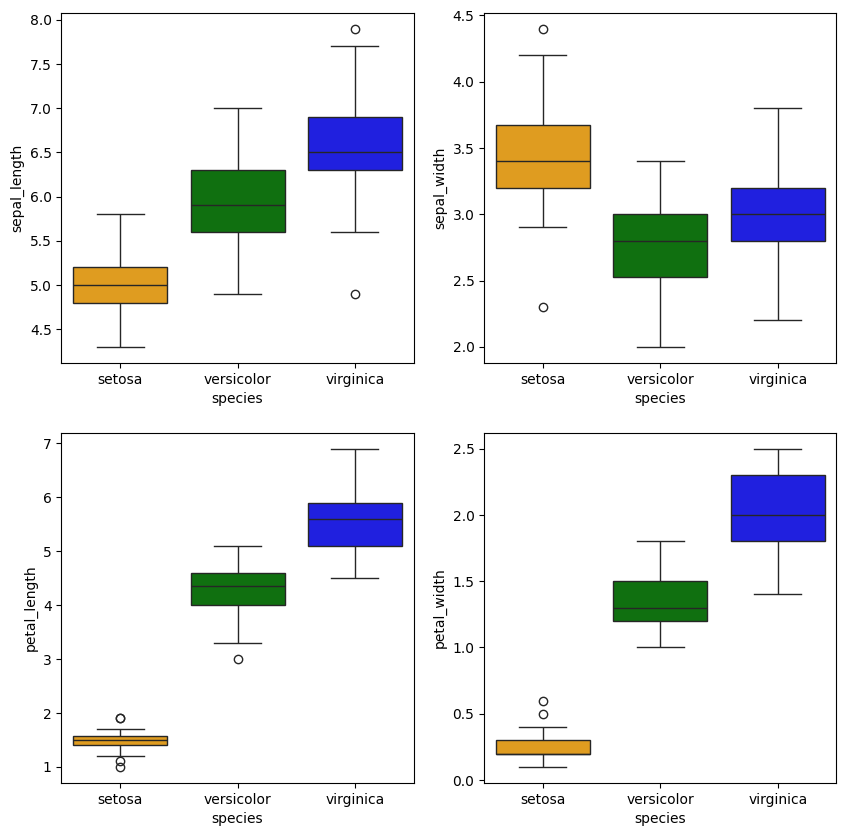

In [16]:
def graph(y): 
    sns.boxplot(x="species", y=y, data=data, palette=["orange", "green", "blue"]) 

plt.figure(figsize=(10,10)) 

plt.subplot(221) 
graph('sepal_length') 
  
plt.subplot(222) 
graph('sepal_width') 
  
plt.subplot(223) 
graph('petal_length') 
  
plt.subplot(224) 
graph('petal_width') 
  
plt.show()

From the above graph, we can infer that :

- Species Setosa has the smallest features and less distributed with some outliers.
- Species Versicolor has the average features.
- Species Virginica has the highest features

### Handling Outliers :

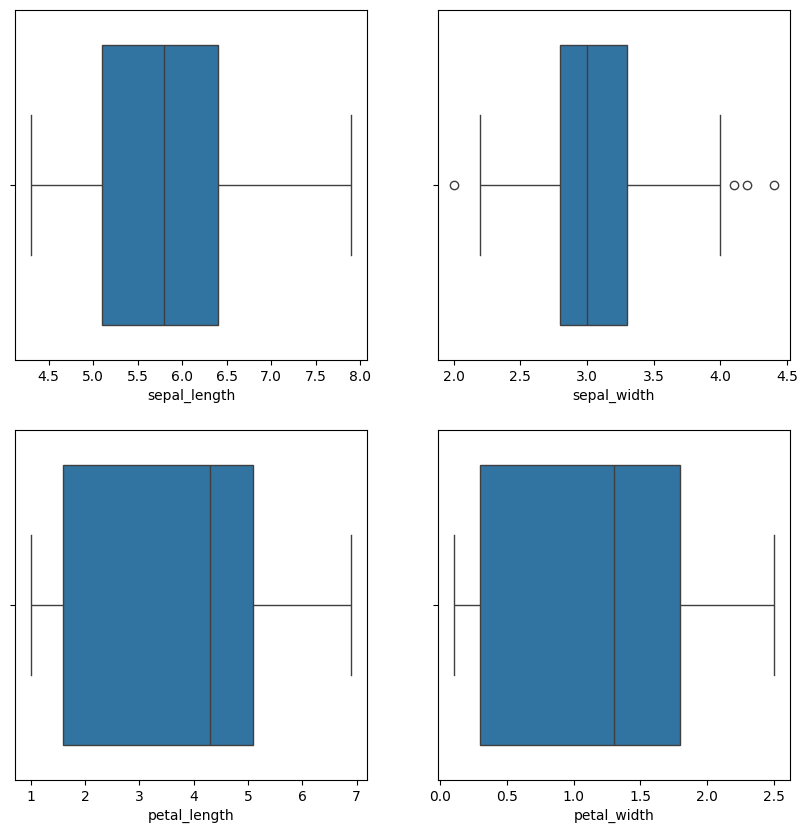

In [17]:
def graph(x): 
    sns.boxplot(x=x, data=data)

plt.figure(figsize=(10,10)) 

plt.subplot(221) 
graph('sepal_length') 
  
plt.subplot(222) 
graph('sepal_width') 
  
plt.subplot(223) 
graph('petal_length') 
  
plt.subplot(224) 
graph('petal_width') 
  
plt.show()

#### Removing Outliers from sepal_width feature :

- In the above graph in sepal width, values above 4 and below 2 are acting as outliers.
- We will detect the outliers using IQR and then we will remove them. We will also draw the boxplot to see if the outliers are removed or not.

Old Shape:  (149, 5)
New Shape:  (145, 5)


<Axes: xlabel='sepal_width'>

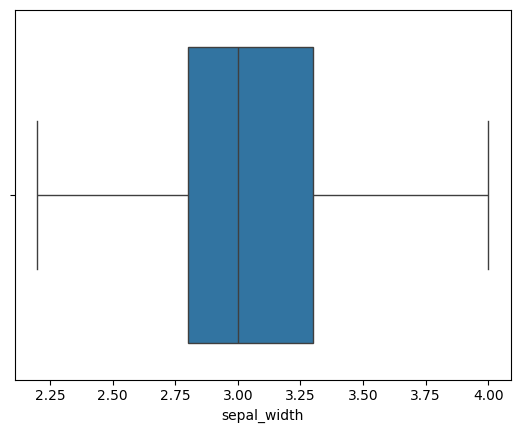

In [18]:
# IQR 
Q1 = np.percentile(data['sepal_width'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(data['sepal_width'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 

print("Old Shape: ", data.shape) 

# Upper bound 
upper = np.where(data['sepal_width'] >= (Q3+1.5*IQR)) 

# Lower bound 
lower = np.where(data['sepal_width'] <= (Q1-1.5*IQR)) 

# Removing the Outliers 
data.drop(upper[0], inplace = True) 
data.drop(lower[0], inplace = True) 

print("New Shape: ", data.shape)

sns.boxplot(x='sepal_width', data=data)

## Feature Engineering :
### Encode Categorical Variables :

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

In [20]:
features = data.drop(columns=['species'])
target = data['species']

## Correlation Analysis :

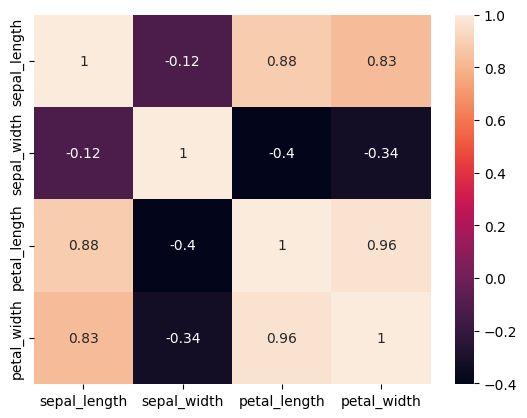

In [21]:
sns.heatmap(features.corr(), annot=True)
plt.show()

From the above graph, we can see that:

- Petal width and petal length have high correlations. 
- Petal length and sepal width have good correlations.
- Petal Width and Sepal length have good correlations.

## Create Machine Learning Model : 

### Data Splitting :

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Model Training and Evaluation :

Accuracy of Logistic Regression :  0.9310344827586207


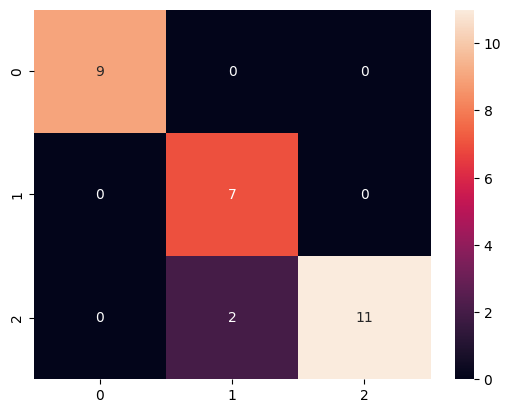

In [23]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

print("Accuracy of Logistic Regression : ", accuracy_score(y_test, y_pred_logistic))
confmat = confusion_matrix(y_pred_logistic, y_test) 
sns.heatmap(confmat, annot=True)
plt.show()

Accuracy DecisionTreeClassifier (CART) :  0.9310344827586207


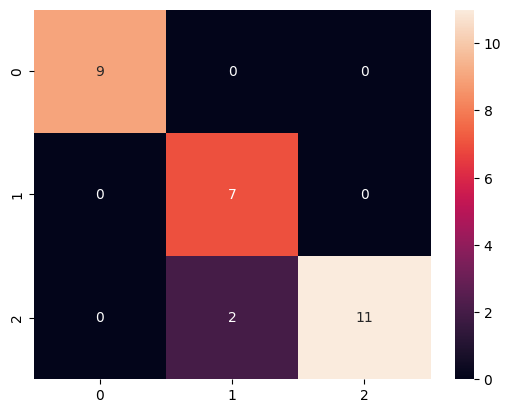

In [24]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_tree = dt_model.predict(X_test)

print("Accuracy DecisionTreeClassifier (CART) : ", accuracy_score(y_test, y_pred_tree))
confmat = confusion_matrix(y_pred_tree, y_test) 
sns.heatmap(confmat, annot=True)
plt.show()

Accuracy RandomForestClassifier :  0.9310344827586207


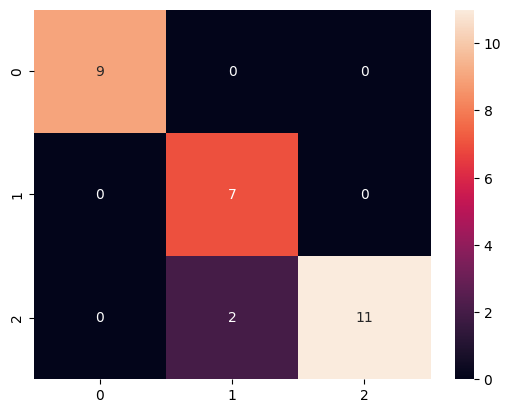

In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Accuracy RandomForestClassifier : ", accuracy_score(y_test, y_pred_rf))
confmat = confusion_matrix(y_pred_rf, y_test) 
sns.heatmap(confmat, annot=True)
plt.show()

Accuracy SVC :  0.9655172413793104


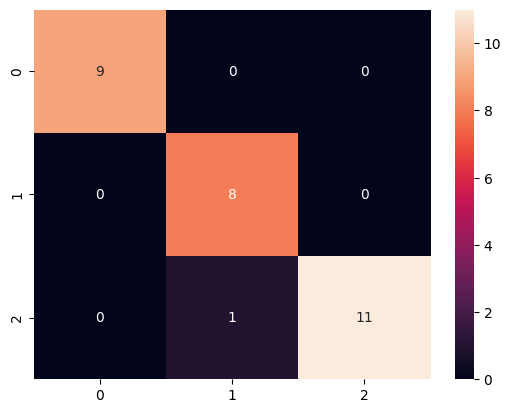

In [26]:
svg_model = SVC(kernel = 'rbf', gamma = 0.1)
svg_model.fit(X_train, y_train)
y_pred_svg = svg_model.predict(X_test)

print("Accuracy SVC : ", accuracy_score(y_test, y_pred_svg))
confmat = confusion_matrix(y_pred_svg, y_test) 
sns.heatmap(confmat, annot=True)
plt.show()

Accuracy KNeighborsClassifier :  0.9655172413793104


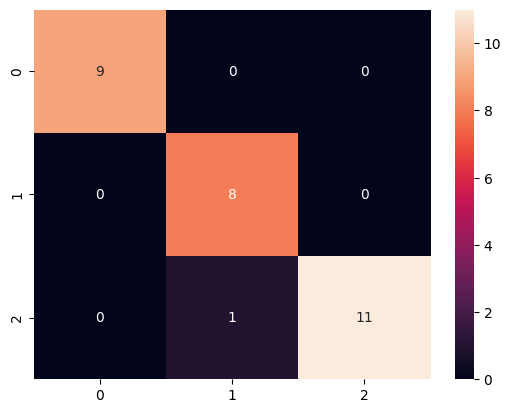

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("Accuracy KNeighborsClassifier : ", accuracy_score(y_test, y_pred_knn))
confmat = confusion_matrix(y_pred_knn, y_test) 
sns.heatmap(confmat, annot=True)
plt.show()

### Use lazy Predict Library :

In [28]:
# fitting data in LazyClassifier 
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None) 
models, predictions = clf.fit(X_train, X_test, y_train, y_test) 
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 34.29it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 4
[LightGBM] [Info] Start training from score -1.116004
[LightGBM] [Info] Start training from score -1.064711
[LightGBM] [Info] Start training from score -1.116004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w